# Fill nan by forward filling + median or mean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
import itertools
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import missingno as msno
plt.style.use("default") 


In [12]:
# import parquet file 

df_a =pd.read_parquet('data/time_grid_processed_raw_sparse_data_set-a.parquet', engine='pyarrow')
df_b =pd.read_parquet('data/time_grid_processed_raw_sparse_data_set-b.parquet', engine='pyarrow')
df_c =pd.read_parquet('data/time_grid_processed_raw_sparse_data_set-c.parquet', engine='pyarrow')

drop_ICUType = True 
if drop_ICUType:
    df_a = df_a.drop(columns=['ICUType'])
    df_b = df_b.drop(columns=['ICUType'])
    df_c = df_c.drop(columns=['ICUType'])



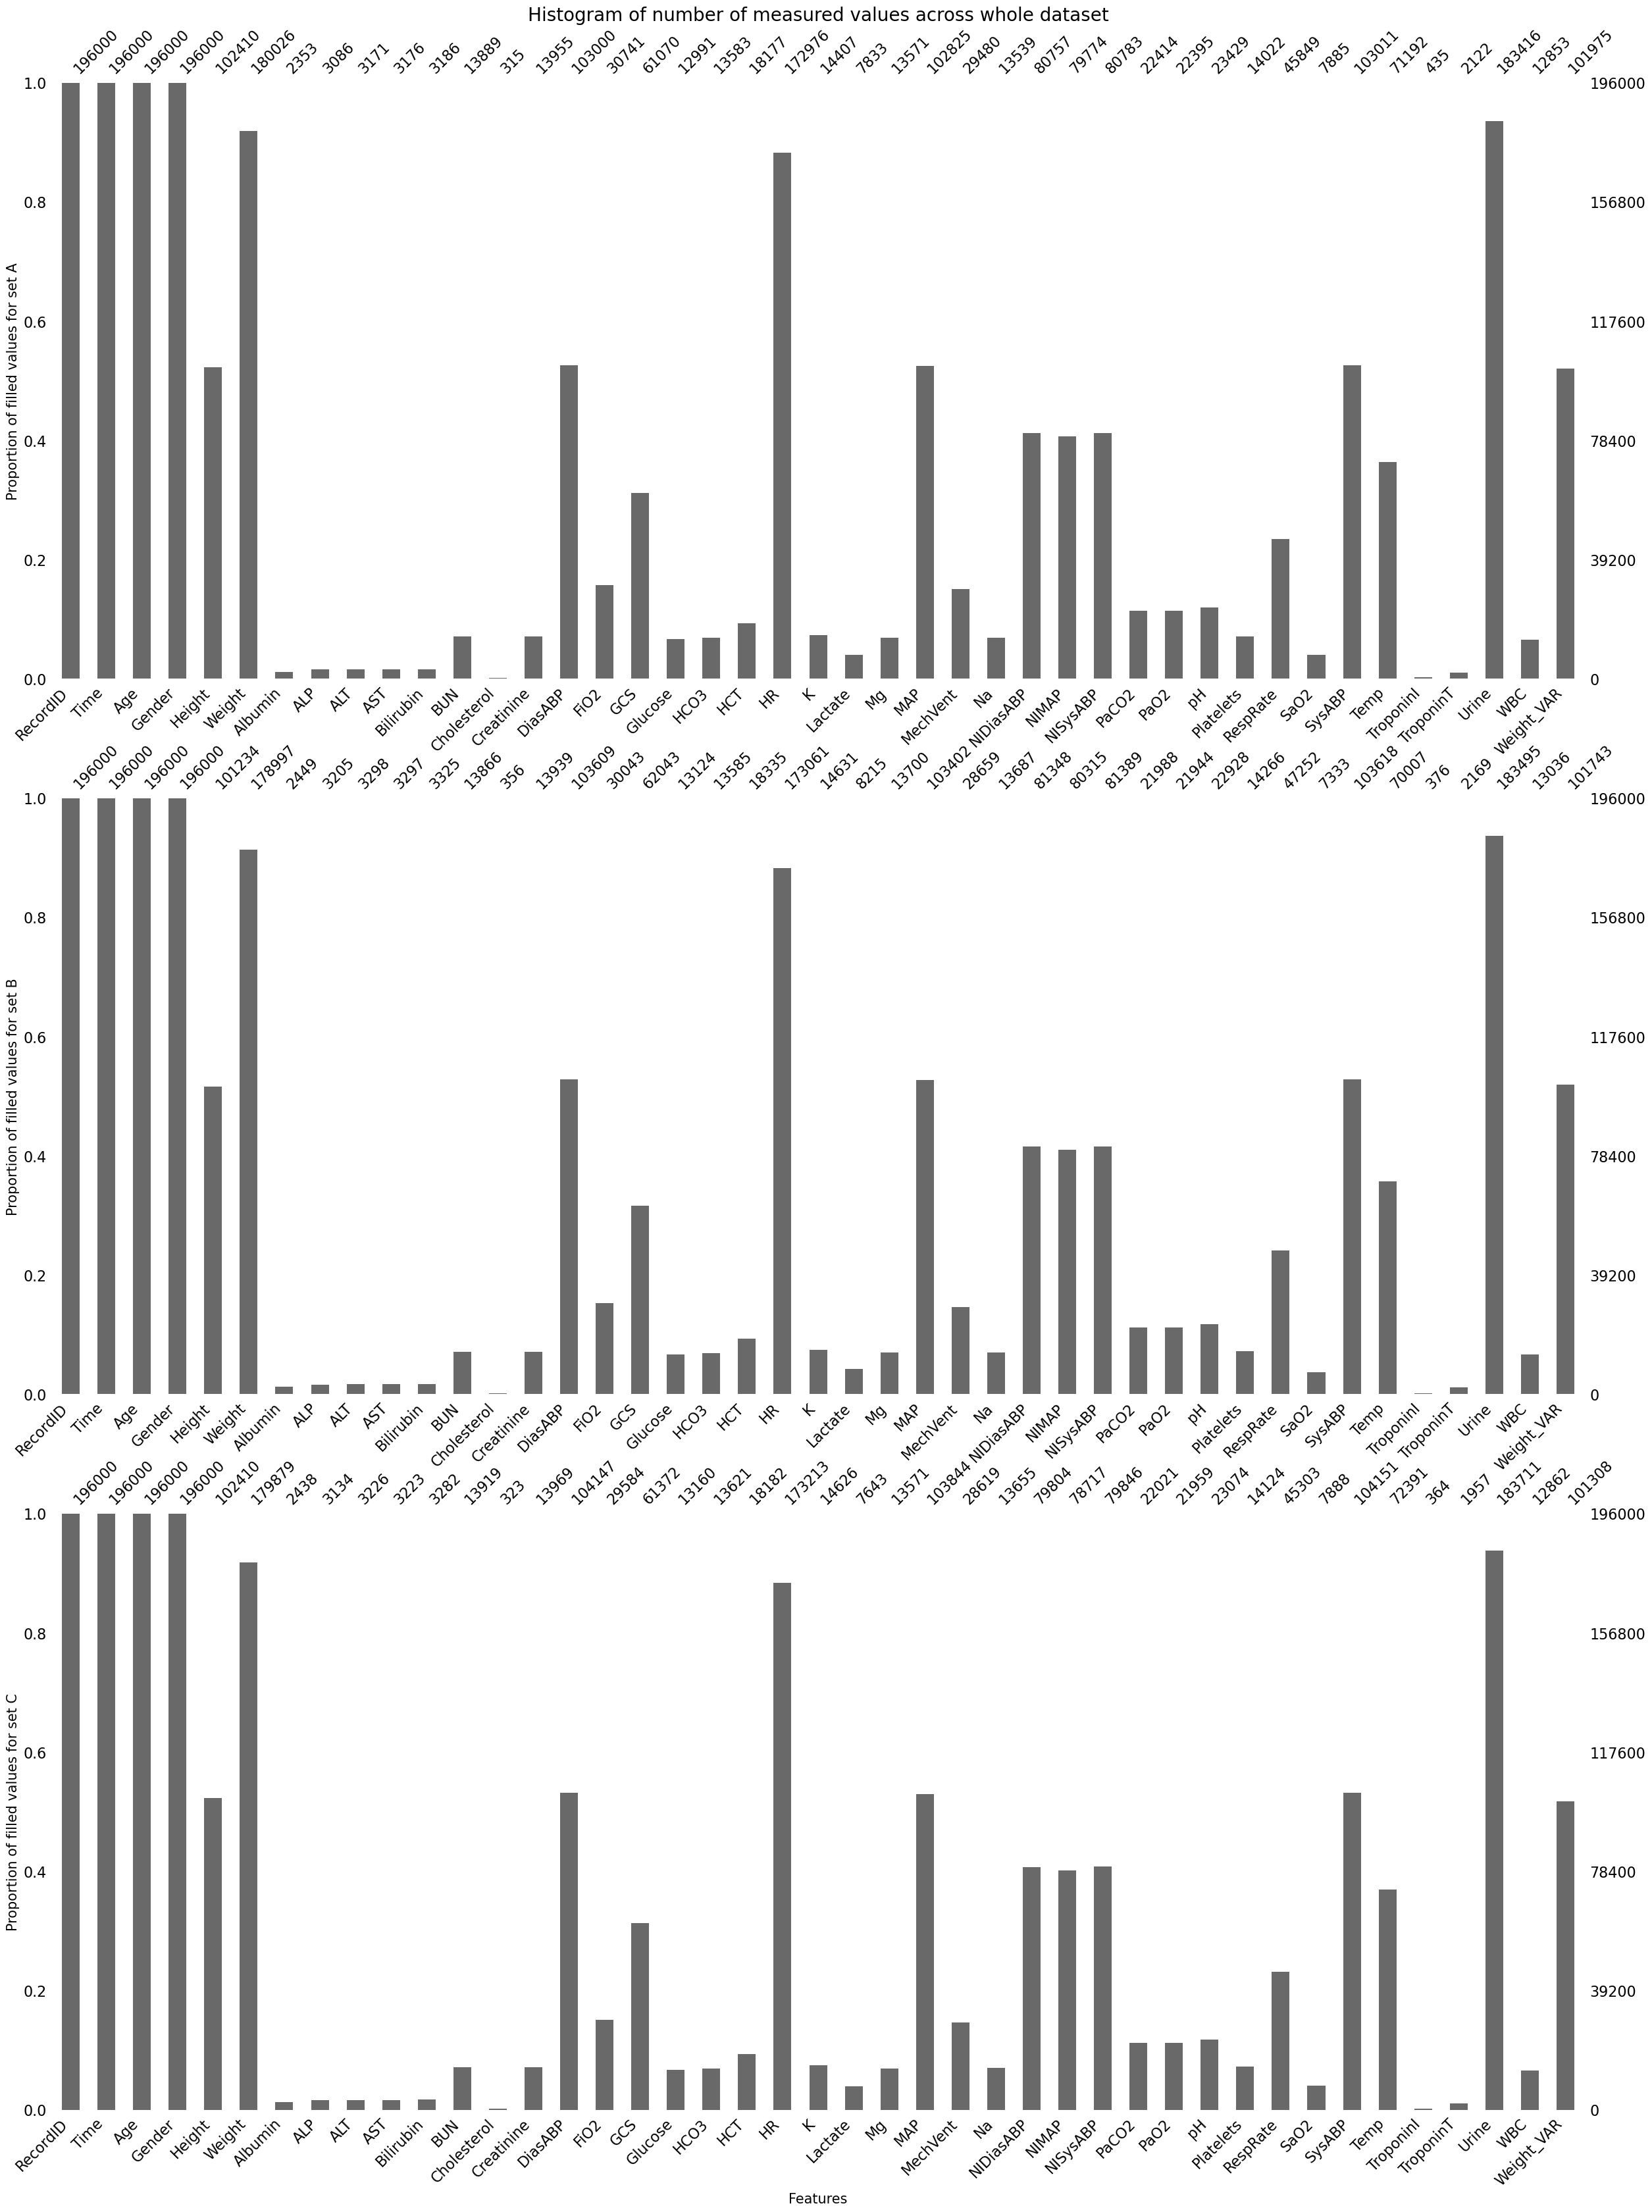

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(30, 40))
msno.bar(df_a, ax=ax[0])
msno.bar(df_b, ax=ax[1])
msno.bar(df_c, ax=ax[2])

ax[0].set_title("Histogram of number of measured values across whole dataset", fontsize=20)
ax[0].set_ylabel("Proportion of filled values for set A", fontsize=15)
ax[1].set_ylabel("Proportion of filled values for set B", fontsize=15)
ax[2].set_ylabel("Proportion of filled values for set C", fontsize=15)
ax[0].set_xlabel("", fontsize=15)
ax[1].set_xlabel("", fontsize=15)
ax[2].set_xlabel("Features", fontsize=15)

plt.show()

In [13]:
static_variables = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']
if 'ICUType' in df_a.columns:
    static_variables.remove('ICUType')
static_variables_we_want = ['Age', 'Gender', 'Height', 'Weight']
all_variables = ['Weight', 'Age', 'TroponinI', 'DiasABP', 'MechVent', 'HCO3', 'Cholesterol', 'HCT', 'SaO2', 'WBC', 'SysABP', 'Urine', 'ICUType', 'Gender', 'ALP', 'Creatinine', 'K', 'AST', 'Glucose', 'RespRate', 'MAP', 'FiO2', 'BUN', 'Na', 'Bilirubin', 'TroponinT', 'PaCO2', 'Height', 'GCS', 'HR', 'pH', 'PaO2', 'Lactate', 'ALT', 'NISysABP', 'RecordID', 'Platelets', 'Temp', 'Mg', 'NIDiasABP', 'Albumin', 'NIMAP']
dyn_variables = [x for x in all_variables if x not in static_variables]
dyn_variables.append('Weight_VAR')
len(dyn_variables), len(static_variables_we_want)

(37, 4)

## Compute value to add when no previous value from training set a 

In [14]:
# load 
means_a = df_a.mean()
medians_a = df_a.median()

## Handling missing data, forward filling and taking mean or median of training set a

Forward filling.

When there is no previous value => median or mean , can choose , but always from set a

In [15]:
print('filling nan of set a')
for r_id in tqdm(df_a.RecordID.unique()):
    r_id_df = df_a[df_a.RecordID == r_id]
    r_id_df = r_id_df.ffill(axis=0)
    #  choose here
    r_id_df = r_id_df.fillna(medians_a) # or means_a

    df_a.loc[df_a['RecordID'] == r_id] = r_id_df


df_a.to_parquet('data/time_grid_processed_raw_no-NaN_data_set-a.parquet', engine='pyarrow')
    
print('filling nan of set b')
for r_id in tqdm(df_b.RecordID.unique()):
    r_id_df = df_b[df_b.RecordID == r_id]
    r_id_df = r_id_df.ffill(axis=0)
    #  choose here
    r_id_df = r_id_df.fillna(medians_a)

    df_b.loc[df_b['RecordID'] == r_id] = r_id_df

df_b.to_parquet('data/time_grid_processed_raw_no-NaN_data_set-b.parquet', engine='pyarrow')

print('filling nan of set c')
for r_id in tqdm(df_c.RecordID.unique()):
    r_id_df = df_c[df_c.RecordID == r_id]
    r_id_df = r_id_df.ffill(axis=0)
    #  choose here
    r_id_df = r_id_df.fillna(medians_a)

    df_c.loc[df_c['RecordID'] == r_id] = r_id_df

df_c.to_parquet('data/time_grid_processed_raw_no-NaN_data_set-c.parquet', engine='pyarrow')


filling nan of set a


100%|██████████| 4000/4000 [00:21<00:00, 185.49it/s]


filling nan of set b


100%|██████████| 4000/4000 [00:20<00:00, 196.72it/s]


filling nan of set c


100%|██████████| 4000/4000 [00:20<00:00, 191.76it/s]
